In [1]:
import rioxarray as rxr
import geopandas as gpd
import matplotlib.pyplot as plt
from loguru import logger
import numpy as np

from valleyfloor.process_topography import process_topography
from valleyfloor.delineate_reaches import delineate_reaches
from valleyfloor.utils import setup_wbt

logger.enable("valleyfloor")

In [2]:
wbt = setup_wbt("~/opt/WBT/", "../working_dir")

dem = rxr.open_rasterio("../data/input/dem.tif", masked=True).squeeze()
flowlines = gpd.read_file("../data/input/flowlines.shp")

In [21]:
dataset, aligned_flowlines = process_topography(dem, flowlines, wbt)
aligned_flowlines = gpd.GeoSeries(aligned_flowlines['geometry'].values, index=aligned_flowlines['Stream_ID'])
aligned_flowlines

2024-10-10 12:22:50.879 | INFO     | valleyfloor.process_topography:process_topography:36 - process topography
/Users/arthurkoehl/Library/Caches/pypoetry/virtualenvs/slopes-mqMb1mKH-py3.10/lib/python3.10/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


Stream_ID
1.0     LINESTRING (393865.5 3791235.5, 393866.5 37912...
2.0     LINESTRING (395219.5 3791163.5, 395218.5 37911...
3.0     LINESTRING (394322.5 3791032.5, 394322.5 37910...
4.0     LINESTRING (395096.5 3791023.5, 395096.5 37910...
5.0     LINESTRING (394657.5 3790993.5, 394654.5 37909...
6.0     LINESTRING (394902.5 3790597.5, 394902.5 37905...
7.0     LINESTRING (394514.5 3790355.5, 394514.5 37903...
9.0     LINESTRING (394536.5 3790394.5, 394536.5 37903...
10.0    LINESTRING (394129.5 3790570.5, 394128.5 37905...
11.0    LINESTRING (394631.5 3790957.5, 394630.5 37909...
12.0    LINESTRING (395030.5 3791080.5, 395029.5 37910...
13.0    LINESTRING (394304.5 3790811.5, 394301.5 37908...
14.0    LINESTRING (394144.5 3790721.5, 394143.5 37907...
dtype: geometry

In [4]:
from slopes.subbasins import label_subbasins
from slopes.hillslopes import label_hillslopes

In [5]:
subbasins = label_subbasins(dataset['flow_dir'], dataset['flow_acc'], dataset['flowpaths'], wbt)

In [6]:
hillslopes = label_hillslopes(dataset['flowpaths'], dataset['flow_dir'], subbasins, wbt)

In [7]:
from slopes.network_xsections import flowline_xsections, flowline_xsections, observe_values

In [14]:
test = flowline_xsections(aligned_flowlines['geometry'].iloc[0], 20, 100, 5)

In [18]:
test

,geom,xsID,alpha
0,POINT (393765.666 3791229.743),0,-100
1,POINT (393770.658 3791230.03),0,-95
2,POINT (393775.649 3791230.318),0,-90
3,POINT (393780.641 3791230.606),0,-85
4,POINT (393785.633 3791230.894),0,-80
...,...,...,...
36,POINT (394071.775 3790688.166),37,80
37,POINT (394067.23 3790686.083),37,85
38,POINT (394062.685 3790683.999),37,90
39,POINT (394058.14 3790681.916),37,95


In [77]:
flowline = aligned_flowlines.loc[aligned_flowlines['Stream_ID'] == stream_ID, 'geometry'].iloc[0]

In [23]:
from slopes.network_xsections import *

In [36]:
xs = network_xsections(aligned_flowlines, dataset[['hand', 'slope', 'curvature', 'flowpaths']], 10, 40, 3, subbasins=subbasins)

In [40]:
xs

,geom,pointID,streamID,xsID,alpha,hand,slope,curvature,flowpaths
10335,POINT (393625.898 3791221.682),0,1.0,0,-240,107.612671,23.628363,0.083788,NaN
10336,POINT (393628.893 3791221.855),1,1.0,0,-237,106.106201,35.746117,0.005076,NaN
10337,POINT (393631.888 3791222.028),2,1.0,0,-234,104.343018,34.781956,0.007310,NaN
10338,POINT (393634.883 3791222.2),3,1.0,0,-231,103.168396,35.098934,0.012746,NaN
10339,POINT (393637.878 3791222.373),4,1.0,0,-228,101.884338,36.102535,0.006214,NaN
...,...,...,...,...,...,...,...,...,...
50551,POINT (394088.873 3790576.288),51184,14.0,15,41,31.801147,32.161064,0.022121,NaN
50542,POINT (394100.642 3790573.367),51185,14.0,16,29,21.597717,40.997223,0.024729,NaN
50543,POINT (394097.657 3790573.663),51186,14.0,16,32,23.764709,40.892307,-0.000555,NaN
50544,POINT (394094.671 3790573.96),51187,14.0,16,35,26.300537,41.237778,0.011290,NaN


In [132]:
stream_xs= xs.loc[xs['streamID'] == 9]
stream_xs

,alpha,point,cross_section_id,streamID,hand,slope,curvature,flowpaths
18413,-119,POINT (394224.584 3790380.495),32,9.0,112.794800,36.905663,-0.001763,NaN
18414,-116,POINT (394224.966 3790383.47),32,9.0,110.356628,39.364204,0.003489,NaN
18415,202,POINT (394246.962 3790295.843),31,9.0,191.081238,36.130737,0.086357,NaN
18416,199,POINT (394247.003 3790298.843),31,9.0,188.350281,43.396084,0.003723,NaN
18417,196,POINT (394247.044 3790301.843),31,9.0,185.405579,39.749565,-0.018660,NaN
...,...,...,...,...,...,...,...,...
23239,103,POINT (394251.805 3790601.084),34,9.0,83.280502,15.774502,0.011072,NaN
23240,-104,POINT (394251.143 3790601.815),31,9.0,83.280502,15.774502,0.011072,NaN
23241,103,POINT (394252.882 3790600.684),32,9.0,83.349044,18.251348,0.032537,NaN
23242,103,POINT (394256.676 3790601.048),30,9.0,84.671981,13.587378,0.018673,NaN


In [143]:
sample = stream_xs.loc[stream_xs['cross_section_id'] == 15].sort_values('alpha')

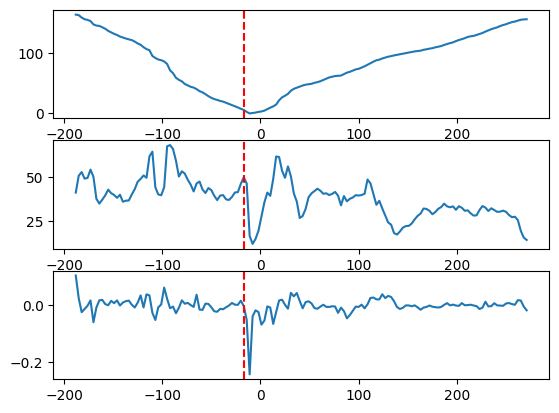

In [144]:
fig, axes = plt.subplots(3)
axes[0].plot(sample['alpha'], sample['hand'])
axes[0].axvline(x=-17, color='r', linestyle='--')
axes[1].plot(sample['alpha'], sample['slope'])
axes[1].axvline(x=-17, color='r', linestyle='--')
axes[2].plot(sample['alpha'], sample['curvature'])
axes[2].axvline(x=-17, color='r', linestyle='--')

In [145]:
import ruptures as rpt

In [147]:
from valleyfloor.profile.preprocess import preprocess_profile

In [148]:
profile = sample

In [149]:
preprocess_profile(profile)

ValueError: Columns missing from xs points

In [150]:
sample

,alpha,point,cross_section_id,streamID,hand,slope,curvature,flowpaths
19055,-188,POINT (394324.043 3790294.07),15,9.0,163.360107,41.264210,0.104521,NaN
19056,-185,POINT (394325.315 3790296.787),15,9.0,162.513916,50.936649,0.024991,NaN
19057,-182,POINT (394326.587 3790299.503),15,9.0,158.473999,53.052769,-0.024211,NaN
19058,-179,POINT (394327.86 3790302.22),15,9.0,155.763367,49.283203,-0.012757,NaN
19880,-176,POINT (394329.132 3790304.937),15,9.0,154.632690,49.708302,-0.001451,NaN
...,...,...,...,...,...,...,...,...
22179,259,POINT (394513.625 3790698.876),15,9.0,151.951538,27.389698,0.001789,NaN
22181,262,POINT (394514.897 3790701.592),15,9.0,153.472595,25.507053,0.017965,NaN
22183,265,POINT (394516.169 3790704.309),15,9.0,154.874817,19.340988,0.016779,NaN
22496,268,POINT (394517.442 3790707.026),15,9.0,155.420288,15.427438,-0.004294,NaN


In [19]:
aligned_flowlines

,Stream_ID,geometry
0,1.0,"LINESTRING (393865.5 3791235.5, 393866.5 37912..."
1,2.0,"LINESTRING (395219.5 3791163.5, 395218.5 37911..."
2,3.0,"LINESTRING (394322.5 3791032.5, 394322.5 37910..."
3,4.0,"LINESTRING (395096.5 3791023.5, 395096.5 37910..."
4,5.0,"LINESTRING (394657.5 3790993.5, 394654.5 37909..."
5,6.0,"LINESTRING (394902.5 3790597.5, 394902.5 37905..."
6,7.0,"LINESTRING (394514.5 3790355.5, 394514.5 37903..."
7,9.0,"LINESTRING (394536.5 3790394.5, 394536.5 37903..."
8,10.0,"LINESTRING (394129.5 3790570.5, 394128.5 37905..."
9,11.0,"LINESTRING (394631.5 3790957.5, 394630.5 37909..."


In [27]:
for idx, val in aligned_flowlines.items():
    print(idx, val)

1.0 LINESTRING (393865.5 3791235.5, 393866.5 3791234.5, 393866.5 3791228.5, 393865.5 3791227.5, 393865.5 3791223.5, 393863.5 3791221.5, 393863.5 3791220.5, 393862.5 3791220.5, 393856.5 3791214.5, 393856.5 3791212.5, 393857.5 3791211.5, 393857.5 3791210.5, 393858.5 3791209.5, 393858.5 3791208.5, 393857.5 3791207.5, 393859.5 3791205.5, 393859.5 3791180.5, 393858.5 3791179.5, 393858.5 3791177.5, 393857.5 3791176.5, 393857.5 3791175.5, 393856.5 3791174.5, 393856.5 3791173.5, 393854.5 3791171.5, 393854.5 3791164.5, 393852.5 3791162.5, 393852.5 3791161.5, 393851.5 3791160.5, 393851.5 3791159.5, 393852.5 3791158.5, 393852.5 3791150.5, 393851.5 3791149.5, 393851.5 3791146.5, 393852.5 3791145.5, 393852.5 3791137.5, 393853.5 3791136.5, 393853.5 3791135.5, 393854.5 3791134.5, 393854.5 3791132.5, 393855.5 3791131.5, 393855.5 3791128.5, 393856.5 3791127.5, 393857.5 3791127.5, 393858.5 3791126.5, 393859.5 3791126.5, 393860.5 3791127.5, 393864.5 3791127.5, 393865.5 3791126.5, 393867.5 3791126.5, 3938